In [1]:
!pip install swifter

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=48bfd9742c76f68d5fa65644c548898987a3221a889f0a26293037af5beb9339
  Stored in directory: c:\users\2216027\appdata\local\pip\cache\wheels\2b\5e\f2\3931524f702ffd03309e96d35ee2fbf9c61c27377511ee8d4c
Successfully built swifter


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import swifter

Load the data

In [7]:
path_to_data = 'C:\\Users\\2216027\\kaggle11\\'

train_data = pd.read_csv(path_to_data+'train.csv.zip')
test_data = pd.read_csv(path_to_data+'test.csv.zip')

train_data.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,4,9,2,1,2,2,4,7,2,8,0
1,1,4,3,6,1,12,3,11,2,7,0
2,1,11,4,1,3,7,4,11,2,1,2
3,2,9,2,4,3,6,1,9,4,9,3
4,1,8,2,4,2,11,2,2,2,1,0


In [8]:
test_data.head()

,id,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,1,10,2,2,3,3,3,8,1,1
1,2,2,13,3,5,3,7,4,6,1,4
2,3,1,3,1,11,2,8,2,1,2,4
3,4,1,6,3,3,4,7,1,8,3,11
4,5,2,10,3,4,1,6,2,12,2,6


Check missing values

In [9]:
train_data.isnull().sum()

S1      0
C1      0
S2      0
C2      0
S3      0
C3      0
S4      0
C4      0
S5      0
C5      0
hand    0
dtype: int64

In [11]:
train_data.nunique()

S1       4
C1      13
S2       4
C2      13
S3       4
C3      13
S4       4
C4      13
S5       4
C5      13
hand    10
dtype: int64

In [12]:
test_data.isnull().sum()

id    0
S1    0
C1    0
S2    0
C2    0
S3    0
C3    0
S4    0
C4    0
S5    0
C5    0
dtype: int64

In [13]:
test_data.nunique()

id    1000000
S1          4
C1         13
S2          4
C2         13
S3          4
C3         13
S4          4
C4         13
S5          4
C5         13
dtype: int64

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S1      25010 non-null  int64
 1   C1      25010 non-null  int64
 2   S2      25010 non-null  int64
 3   C2      25010 non-null  int64
 4   S3      25010 non-null  int64
 5   C3      25010 non-null  int64
 6   S4      25010 non-null  int64
 7   C4      25010 non-null  int64
 8   S5      25010 non-null  int64
 9   C5      25010 non-null  int64
 10  hand    25010 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


In [26]:
train_data.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [27]:
train_data.shape

(25010, 11)

In [28]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   S1      1000000 non-null  int64
 1   C1      1000000 non-null  int64
 2   S2      1000000 non-null  int64
 3   C2      1000000 non-null  int64
 4   S3      1000000 non-null  int64
 5   C3      1000000 non-null  int64
 6   S4      1000000 non-null  int64
 7   C4      1000000 non-null  int64
 8   S5      1000000 non-null  int64
 9   C5      1000000 non-null  int64
dtypes: int64(10)
memory usage: 76.3 MB


In [29]:
test_data.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.500493,6.997927,2.499894,7.006097,2.500871,6.998873,2.500393,7.002298,2.499451,6.989481
std,1.117768,3.743374,1.118568,3.743481,1.118225,3.741890,1.117245,3.741270,1.118948,3.739894
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000
50%,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,2.000000,7.000000
75%,3.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,4.000000,10.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000


In [30]:
test_data.shape

(1000000, 10)

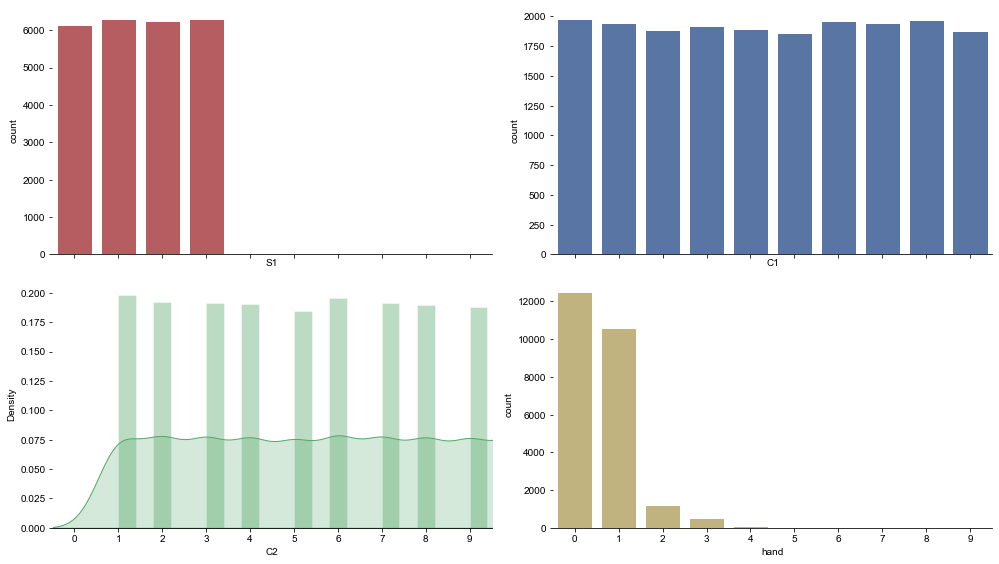

In [14]:
f, ax = plt.subplots(2, 2, figsize=(14, 8), sharex=True)
sns.set()
sns.despine(left=True)

sns.countplot(train_data['S1'], color='r', ax=ax[0, 0])

sns.countplot(train_data['C1'], color='b', ax=ax[0, 1])

sns.distplot(train_data['C2'], color='g', kde_kws={'shade': True}, ax=ax[1, 0])

sns.countplot(train_data['hand'], color='y', ax=ax[1, 1])

plt.tight_layout()


In [17]:
train_data['hand'].value_counts()

0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
9        5
8        5
Name: hand, dtype: int64

In [18]:
def pair(row):
    cards = list(row[['C1', 'C2', 'C3', 'C4', 'C5']].values)
    for card in cards:
        if cards.count(card) == 2:
            return True
    return False

def two_pair(row):
    cards = list(row[['C1', 'C2', 'C3', 'C4', 'C5']].values)
    for card in cards:
        if cards.count(card) == 2:
            cards.remove(card)
            for second_pair in cards:
                if cards.count(second_pair) == 2:
                    return True
    return False

def three(row):
    cards = list(row[['C1', 'C2', 'C3', 'C4', 'C5']].values)
    for card in cards:
        if cards.count(card) == 3:
            return True
    return False

def straight(row):
    cards = list(sorted(row[['C1', 'C2', 'C3', 'C4', 'C5']].values))
    need_to_straight = [4, 3, 2, 1, 0]
    straight_to_2 = [1, 10, 11, 12, 13]
    last_card = cards[-1]
    res = []
    if cards == straight_to_2:
        return True
    for card in cards:
        res.append(last_card - card)
    if res == need_to_straight:
        return True
    return False

def flush(row):
    suits = list(row[['S1', 'S2', 'S3', 'S4', 'S5']].values)
    if len(set(suits)) == 1:
        return True
    return False

def full_house(row):
    cards = list(row[['C1', 'C2', 'C3', 'C4', 'C5']].values)
    for card in cards:
        if cards.count(card) == 3:
            check_full_house = list(filter(lambda x: x != card, cards))
            for second_pair in check_full_house:
                if check_full_house.count(second_pair) == 2:
                    return True
    return False

def four_pair(row):
    cards = list(row[['C1', 'C2', 'C3', 'C4', 'C5']].values)
    for card in cards:
        if cards.count(card) == 4:
            return True
    return False

def straight_flush(row):
    cards = list(sorted(row[['C1', 'C2', 'C3', 'C4', 'C5']].values))
    suits = list(row[['S1', 'S2', 'S3', 'S4', 'S5']].values)
    
    need_to_straight = [4, 3, 2, 1, 0]
    last_card = cards[-1]
    res = []
    
    if len(set(suits)) == 1:
        for card in cards:
            res.append(last_card - card)
        if res == need_to_straight:
            return True
    return False

def royal(row):
    cards = list(sorted(row[['C1', 'C2', 'C3', 'C4', 'C5']].values))
    suits = list(row[['S1', 'S2', 'S3', 'S4', 'S5']].values)
    
    need_to_royal = [1, 10, 11, 12, 13]
    
    if cards == need_to_royal and len(set(suits)) == 1:
        return True
    return False

In [19]:
def poker_combinations(row):
    """
    This function converts information about card in dataset in number of combinations.
    0 - no combinations; 1 - pair; 2 - two pair; 3 - three pair; 4 - straight;
    5 - flush; 6 - full house; 7 - four pair; 8 - straight flush; 9 - royal flush

    Apply this function to train and test dataframe
    """
    if royal(row):
        return 9
    elif straight_flush(row):
        return 8
    elif four_pair(row):
        return 7
    elif full_house(row):
        return 6
    elif flush(row):
        return 5
    elif straight(row):
        return 4
    elif three(row):
        return 3
    elif two_pair(row):
        return 2
    elif pair(row):
        return 1
    else:
        return 0

In [20]:
compare_combinations = train_data.copy()
compare_combinations['combinations'] = compare_combinations.swifter.apply(poker_combinations, axis=1)

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

In [21]:
for i in range(10):
    print('Class ', i)
    print('True number of samples: ', len(compare_combinations[compare_combinations['hand'] == i]), end=', ')
    print('My number of samples: ', len(compare_combinations[compare_combinations['combinations'] == i]))

Class  0
True number of samples:  12493, My number of samples:  12493
Class  1
True number of samples:  10599, My number of samples:  10599
Class  2
True number of samples:  1206, My number of samples:  1206
Class  3
True number of samples:  513, My number of samples:  513
Class  4
True number of samples:  93, My number of samples:  93
Class  5
True number of samples:  54, My number of samples:  54
Class  6
True number of samples:  36, My number of samples:  36
Class  7
True number of samples:  6, My number of samples:  6
Class  8
True number of samples:  5, My number of samples:  5
Class  9
True number of samples:  5, My number of samples:  5


In [22]:
ssubm = pd.read_csv(path_to_data+'sampleSubmission.csv.zip')

In [23]:
test_data = test_data.drop('id', axis=1)
test_data.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,10,2,2,3,3,3,8,1,1
1,2,13,3,5,3,7,4,6,1,4
2,1,3,1,11,2,8,2,1,2,4
3,1,6,3,3,4,7,1,8,3,11
4,2,10,3,4,1,6,2,12,2,6


In [24]:
n_start = 0
n_features = 25000
n_iterations = int(len(test_data) / n_features)

result = np.array([])

for i in range(n_iterations):
    chunk = test_data[n_start:n_features]
    chunk_res = np.array(chunk.swifter.apply(poker_combinations, axis=1))
    result = np.append(result, chunk_res)
    n_start = n_features
    n_features += 25000


Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]